SVM ROS

In [108]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load preprocessed data
data = pd.read_excel(r'\Users\isabe\OneDrive\Documenten\Master DDS\Thesis\A\Data\Final_data.xlsx')

# Define predictor variables and target variable
X = data[['needle_fear', 'HRV', 'nic_caf', 'prior_donor', 'gender']]
y = data['vasovagal_enc']

# Encode target variable
labels = ['none',  'VVR']
y_encoded = pd.Categorical(y, categories=[0, 1], ordered=True).codes

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Define SVM parameters to be tuned by GridSearchCV
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}

# Train an SVM classifier on the resampled training data using GridSearchCV
svm_ROS = SVC(random_state=42, probability=True)
grid_search_ROS = GridSearchCV(svm_ROS, svm_params, cv=5, n_jobs=-1)
grid_search_ROS.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search_ROS.best_params_)

# Print the best score and cross-validation scores
cv_scores = cross_val_score(grid_search_ROS, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print("Cross-validation scores:", cv_scores)
print("Variance of cross-validation scores:", np.var(cv_scores))


# Train an SVM classifier on the resampled training data with the best parameters found by GridSearchCV
best_svm_ROS = SVC(**grid_search_ROS.best_params_, probability=True)
best_svm_ROS.fit(X_train_resampled, y_train_resampled)

# Make predictions on test data
y_test_pred = best_svm_ROS.predict(X_test)

# Evaluate performance on test set using precision, recall, F1-score, and confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test set confusion matrix:")
print(conf_matrix)

print(classification_report(y_test, y_test_pred, target_names=labels))


Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Cross-validation scores: [0.85714286 0.85714286 0.93333333 0.93333333 0.90909091]
Variance of cross-validation scores: 0.0011917018046888196
Test set confusion matrix:
[[8 1]
 [0 3]]
              precision    recall  f1-score   support

        none       1.00      0.89      0.94         9
         VVR       0.75      1.00      0.86         3

    accuracy                           0.92        12
   macro avg       0.88      0.94      0.90        12
weighted avg       0.94      0.92      0.92        12



In [76]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load preprocessed data
data = pd.read_excel(r'\Users\isabe\OneDrive\Documenten\Master DDS\Thesis\A\Data\Final_data.xlsx')

# Define predictor variables and target variable
X = data[['needle_fear', 'HRV', 'nic_caf', 'prior_donor', 'gender']]
y = data['vasovagal_enc']

# Encode target variable
labels = ['none', 'VVR']
y_encoded = pd.Categorical(y, categories=[0, 1], ordered=True).codes

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Define SVM parameters to be tuned by GridSearchCV
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}

# Train an SVM classifier on the resampled training data using GridSearchCV
svm_ROS = SVC(random_state=42, probability=True)
grid_search_ROS = GridSearchCV(svm_ROS, svm_params, cv=5, n_jobs=-1)
grid_search_ROS.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search_ROS.best_params_)

# Print the best score and cross-validation scores
cv_scores = cross_val_score(grid_search_ROS, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print("Cross-validation scores:", cv_scores)
print("Variance of cross-validation scores:", np.var(cv_scores))


# Train an SVM classifier on the resampled training data with the best parameters found by GridSearchCV
best_svm_ROS = SVC(**grid_search_ROS.best_params_, probability=True)
best_svm_ROS.fit(X_train_resampled, y_train_resampled)

# Make predictions on test data
y_test_pred = best_svm_ROS.predict(X_test)

# Evaluate performance on test set using precision, recall, F1-score, and confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test set confusion matrix:")
print(conf_matrix)

print(classification_report(y_test, y_test_pred, target_names=labels))


Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Cross-validation scores: [0.85714286 0.85714286 0.93333333 0.93333333 0.90909091]
Variance of cross-validation scores: 0.0011917018046888196
Test set confusion matrix:
[[8 1]
 [0 3]]
              precision    recall  f1-score   support

        none       1.00      0.89      0.94         9
         VVR       0.75      1.00      0.86         3

    accuracy                           0.92        12
   macro avg       0.88      0.94      0.90        12
weighted avg       0.94      0.92      0.92        12



In [89]:
# Evaluate performance on the training set
y_train_pred = best_svm_ROS.predict(X_train_resampled)
y_train_pred_prob = best_svm_ROS.predict_proba(X_train_resampled)[:, 1]
auc_train = roc_auc_score(y_train_resampled, y_train_pred_prob)

print("Training set performance:")
print(classification_report(y_train_resampled, y_train_pred, target_names=labels))
print("AUC Train:", auc_train)

Training set performance:
              precision    recall  f1-score   support

        none       0.94      0.94      0.94        34
         VVR       0.94      0.94      0.94        34

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68

AUC Train: 0.9878892733564014


In [107]:
importances = best_svm_ROS.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)


Feature Importance:
           Feature  Importance
0              HRV    3.180052
1      needle_fear    2.422079
2          nic_caf    1.340190
3           gender    0.762101
4  prior_donations    0.365638


SVM ROS ROC

ROC AUC score:
0.96


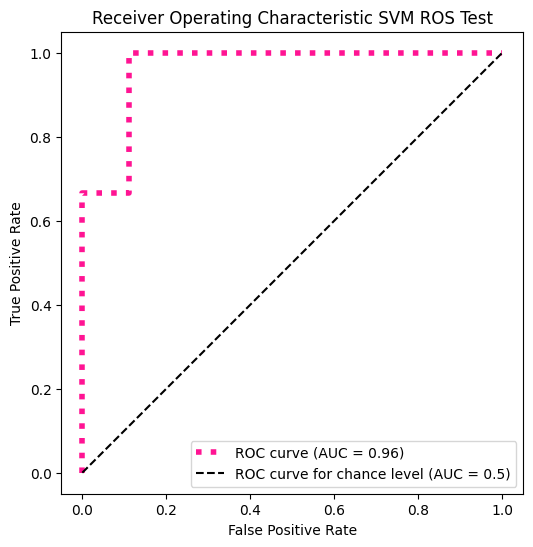

In [77]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.preprocessing import label_binarize
import numpy as np


y_pred_prob = best_svm_ROS.predict_proba(X_test)[:, 1]  # Use the probabilities for the positive class
n_classes = 2
target_names = ['none', 'VVR']

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC score:\n{roc_auc:.2f}")

# Plot ROC curve
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(
    fpr,
    tpr,
    label=f"ROC curve (AUC = {roc_auc:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

# Plot the diagonal line representing chance level
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic SVM ROS Test")
plt.legend()
plt.show()


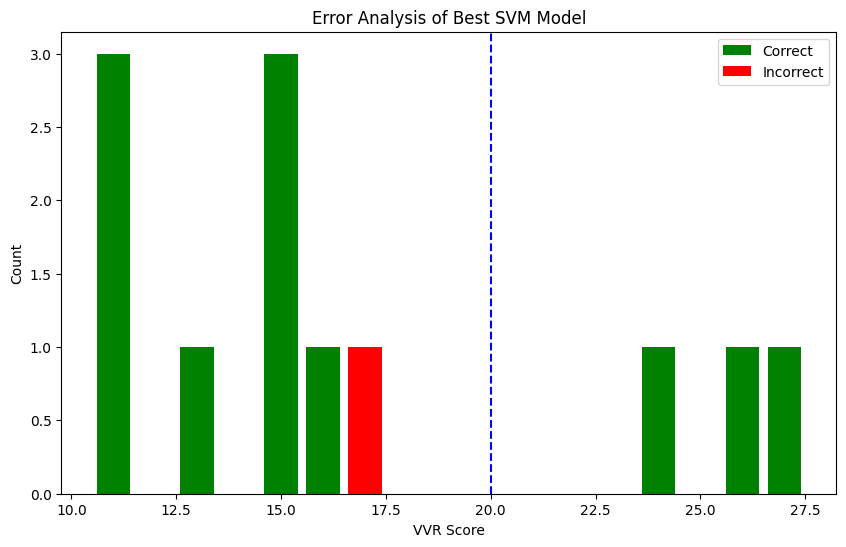

In [104]:
import matplotlib.pyplot as plt

# Make predictions on the test data
y_test_pred = best_svm_ROS.predict(X_test)

# Retrieve the original VVR scores from the data DataFrame
vvr_scores = data.loc[X_test.index, 'vasovagal'].values

# Determine correct and incorrect predictions
correct_predictions = (y_test_pred == y_test)
incorrect_predictions = ~correct_predictions

# Count the occurrences of correct and incorrect predictions for each VVR score
correct_counts = [sum(correct_predictions[vvr_scores == score]) for score in np.unique(vvr_scores)]
incorrect_counts = [sum(incorrect_predictions[vvr_scores == score]) for score in np.unique(vvr_scores)]

# Plot the error analysis graph
plt.figure(figsize=(10, 6))
plt.bar(np.unique(vvr_scores), correct_counts, label='Correct', color='green')
plt.bar(np.unique(vvr_scores), incorrect_counts, label='Incorrect', color='red')
plt.axvline(x=20, color='blue', linestyle='--')  # Add vertical cut-off line at 20
plt.xlabel('VVR Score')
plt.ylabel('Count')
plt.title('Error Analysis of Best SVM Model')
plt.legend()
plt.show()


SVM SMOTE

In [84]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load preprocessed data
data = pd.read_excel(r'\Users\isabe\OneDrive\Documenten\Master DDS\Thesis\A\Data\Final_data.xlsx')

# Define predictor variables and target variable
X = data[['needle_fear', 'HRV', 'nic_caf', 'prior_donor', 'gender']]
y = data['vasovagal_enc']

# Encode target variable
labels = ['none', 'VVR']
y_encoded = pd.Categorical(y, categories=[0, 1], ordered=True).codes

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define SVM parameters to be tuned by GridSearchCV
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}

# Train an SVM classifier on the resampled training data using GridSearchCV
svm_SMOTE = SVC(random_state=42, probability=True)
best_svm_SMOTE = SVC(**grid_search.best_params_, probability=True)
best_svm_SMOTE.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

cv_scores = cross_val_score(best_svm_SMOTE, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print("Cross-validation scores:", cv_scores)
print("Variance of cross-validation scores:", np.var(cv_scores))


# Make predictions on test data
y_test_pred = best_svm_SMOTE.predict(X_test)

# Evaluate performance on test set using precision, recall, F1-score, and confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test set confusion matrix:")
print(conf_matrix)

print(classification_report(y_test, y_test_pred, target_names=labels))


Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Cross-validation scores: [0.85714286 0.72727273 1.         0.93333333 1.        ]
Variance of cross-validation scores: 0.010543910346507748
Test set confusion matrix:
[[8 1]
 [1 2]]
              precision    recall  f1-score   support

        none       0.89      0.89      0.89         9
         VVR       0.67      0.67      0.67         3

    accuracy                           0.83        12
   macro avg       0.78      0.78      0.78        12
weighted avg       0.83      0.83      0.83        12



In [90]:
# Evaluate performance on the training set
y_train_pred = best_svm_SMOTE.predict(X_train_resampled)
y_train_pred_prob = best_svm_SMOTE.predict_proba(X_train_resampled)[:, 1]
auc_train = roc_auc_score(y_train_resampled, y_train_pred_prob)

print("Training set performance:")
print(classification_report(y_train_resampled, y_train_pred, target_names=labels))
print("AUC Train:", auc_train)

Training set performance:
              precision    recall  f1-score   support

        none       0.94      0.94      0.94        34
         VVR       0.94      0.94      0.94        34

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68

AUC Train: 0.9930795847750865


SVM SMOTE ROC

ROC AUC score:
0.90


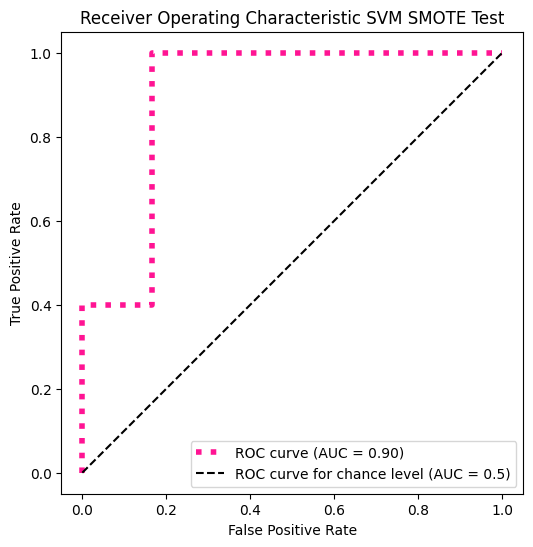

In [83]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.preprocessing import label_binarize
import numpy as np


y_pred_prob = best_svm_SMOTE.predict_proba(X_test)[:, 1]  # Use the probabilities for the positive class
n_classes = 2
target_names = ['none', 'VVR']

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC score:\n{roc_auc:.2f}")

# Plot ROC curve
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(
    fpr,
    tpr,
    label=f"ROC curve (AUC = {roc_auc:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

# Plot the diagonal line representing chance level
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic SVM SMOTE Test")
plt.legend()
plt.show()


SVM ADASYN

In [74]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load preprocessed data
data = pd.read_excel(r'\Users\isabe\OneDrive\Documenten\Master DDS\Thesis\A\Data\Final_data.xlsx')

# Define predictor variables and target variable
X = data[['needle_fear', 'HRV', 'nic_caf', 'prior_donor', 'gender']]
y = data['vasovagal_enc']

# Encode target variable
labels = ['none', 'VVR']
y_encoded = pd.Categorical(y, categories=[0, 1], ordered=True).codes

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# ADASYN Oversampling
ada = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = ada.fit_resample(X_train, y_train)

# Define SVM parameters to be tuned by GridSearchCV
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}

# Train an SVM classifier on the resampled training data using GridSearchCV
svm_ADASYN = SVC(random_state=42, probability=True)
best_svm_ADASYN = SVC(**grid_search.best_params_, probability=True)
best_svm_ADASYN.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Print the best score and cross-validation scores
cv_scores = cross_val_score(best_svm_ADASYN, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print("Cross-validation scores:", cv_scores)
print("Variance of cross-validation scores:", np.var(cv_scores))

# Train an SVM classifier on the resampled training data with the best parameters found by GridSearchCV


# Make predictions on test data
y_test_pred = best_svm_ADASYN.predict(X_test)

# Evaluate performance on test set using precision, recall, F1-score, and confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test set confusion matrix:")
print(conf_matrix)

print(classification_report(y_test, y_test_pred, target_names=labels))


Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Cross-validation scores: [0.93333333 0.92307692 1.         0.93333333 1.        ]
Variance of cross-validation scores: 0.001192899408284024
Test set confusion matrix:
[[8 1]
 [1 2]]
              precision    recall  f1-score   support

        none       0.89      0.89      0.89         9
         VVR       0.67      0.67      0.67         3

    accuracy                           0.83        12
   macro avg       0.78      0.78      0.78        12
weighted avg       0.83      0.83      0.83        12



In [91]:
# Evaluate performance on the training set
y_train_pred = best_svm_ADASYN.predict(X_train_resampled)
y_train_pred_prob = best_svm_ADASYN.predict_proba(X_train_resampled)[:, 1]
auc_train = roc_auc_score(y_train_resampled, y_train_pred_prob)

print("Training set performance:")
print(classification_report(y_train_resampled, y_train_pred, target_names=labels))
print("AUC Train:", auc_train)

Training set performance:
              precision    recall  f1-score   support

        none       1.00      0.94      0.97        34
         VVR       0.94      1.00      0.97        34

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68

AUC Train: 0.9896193771626297


SVM ADASYN ROC

ROC AUC score:
0.93


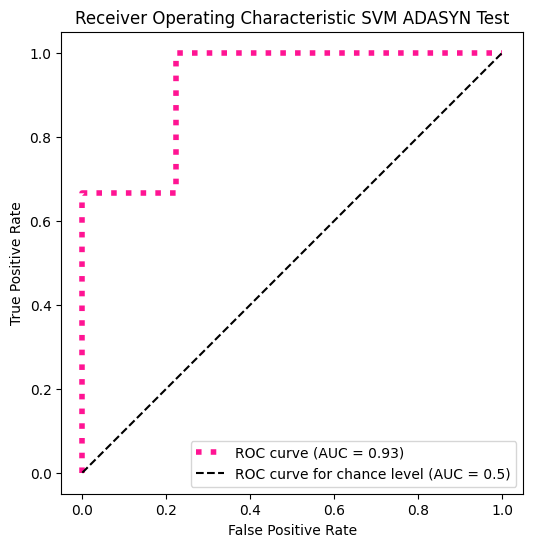

In [75]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.preprocessing import label_binarize
import numpy as np


y_pred_prob = best_svm_ADASYN.predict_proba(X_test)[:, 1]  # Use the probabilities for the positive class
n_classes = 2
target_names = ['none', 'VVR']

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC score:\n{roc_auc:.2f}")

# Plot ROC curve
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(
    fpr,
    tpr,
    label=f"ROC curve (AUC = {roc_auc:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

# Plot the diagonal line representing chance level
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic SVM ADASYN Test")
plt.legend()
plt.show()
